In [2]:
import random
import numpy as np
import tensorflow as tf

SEED = 42 

random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [3]:
import tensorflow as tf
print(tf.__version__)

2.18.0



Folder: drowsy
Number of images: 36030


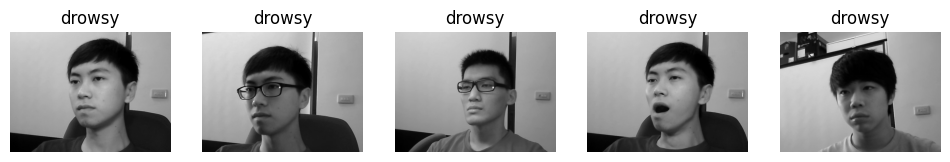

✅ All images in drowsy are of the same size: (480, 640)

Folder: notdrowsy
Number of images: 30491


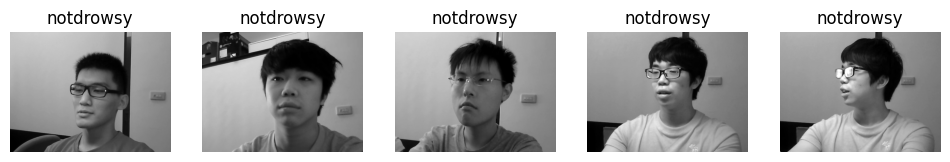

✅ All images in notdrowsy are of the same size: (480, 640)


In [4]:

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2


# dataset path
data_dir ='/kaggle/input/nthuddd2/train_data'

# folders inside train
folders = ['drowsy', 'notdrowsy']

# dictionary to store counts
image_counts = {}

# loop through folders
for folder in folders:
    folder_path = os.path.join(data_dir, folder)
    images = os.listdir(folder_path)
    image_counts[folder] = len(images)
    
    print(f"\nFolder: {folder}")
    print(f"Number of images: {len(images)}")
    
    # plot 5 sample images
    plt.figure(figsize=(12, 6))
    for i, img_name in enumerate(images[:5]):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, 5, i+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(folder)
    plt.show()
    
    # check image sizes
    sizes = set()
    for img_name in images:
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            sizes.add(img.shape[:2])  # (height, width)
    
    if len(sizes) == 1:
        print(f"✅ All images in {folder} are of the same size: {list(sizes)[0]}")
    else:
        print(f"⚠️ Images in {folder} are of different sizes")

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, classification_report
import itertools
import seaborn as sns
import pathlib

# -------------------------
# User config / hyperparams
# -------------------------
data_dir ='/kaggle/input/nthuddd2/train_data'  # CHANGE if needed
TARGET_CLASSES = ['drowsy', 'notdrowsy']
IMG_SIZE = (224, 224)        # fixed size for both custom and transfer models
BATCH_SIZE = 32
SEED = 42
EPOCHS_CUSTOM = 50
EPOCHS_TL = 20
LEARNING_RATE = 1e-3

In [5]:
# -------------------------
# Verify dataset & counts
# -------------------------
for c in TARGET_CLASSES:
    p = os.path.join(data_dir, c)
    if not os.path.isdir(p):
        raise FileNotFoundError(f"Expected directory for class '{c}' at: {p}")
    count = len([f for f in os.listdir(p) if os.path.isfile(os.path.join(p, f))])
    print(f"Class '{c}': {count} images")
    

Class 'drowsy': 36030 images
Class 'notdrowsy': 30491 images


### **Take 10000 images per classes to reduce space**
**If we try with all 30000 images per class it crash the total space of kaggle**

In [6]:
import os
import random
import shutil
from pathlib import Path

# -------------------------
# Config
# -------------------------
data_dir = Path("/kaggle/input/nthuddd2/train_data")  # original dataset
output_dir = Path("/kaggle/working/train_data_sampled")  # or /kaggle/output/train_data_sampled
TARGET_CLASSES = ['drowsy', 'notdrowsy']
SAMPLES_PER_CLASS = 10000
SEED = 42

# Make sure reproducible
random.seed(SEED)

# Create output directories
for cls in TARGET_CLASSES:
    (output_dir / cls).mkdir(parents=True, exist_ok=True)

# -------------------------
# Sampling & Copying
# -------------------------
for cls in TARGET_CLASSES:
    src_dir = data_dir / cls
    dst_dir = output_dir / cls

    all_images = [f for f in os.listdir(src_dir) if os.path.isfile(src_dir / f)]
    print(f"Found {len(all_images)} images in class '{cls}'")

    # Randomly sample up to 10,000
    n_to_sample = min(SAMPLES_PER_CLASS, len(all_images))
    sampled_imgs = random.sample(all_images, n_to_sample)

    print(f"Copying {n_to_sample} images to {dst_dir} ...")

    for img in sampled_imgs:
        shutil.copy(src_dir / img, dst_dir / img)

print("\n✅ Sampling complete! New dataset saved to:")


Found 36030 images in class 'drowsy'
Copying 10000 images to /kaggle/working/train_data_sampled/drowsy ...
Found 30491 images in class 'notdrowsy'
Copying 10000 images to /kaggle/working/train_data_sampled/notdrowsy ...

✅ Sampling complete! New dataset saved to:


In [7]:
# verify counts
data_dir ='/kaggle/working/train_data_sampled'  # Now data_dir we use the sampled images
TARGET_CLASSES = ['drowsy', 'notdrowsy']


# -------------------------
# Verify dataset & counts
# -------------------------
for c in TARGET_CLASSES:
    p = os.path.join(data_dir, c)
    if not os.path.isdir(p):
        raise FileNotFoundError(f"Expected directory for class '{c}' at: {p}")
    count = len([f for f in os.listdir(p) if os.path.isfile(os.path.join(p, f))])
    print(f"Class '{c}': {count} images")
    

Class 'drowsy': 10000 images
Class 'notdrowsy': 10000 images


Found 20000 files belonging to 2 classes.
Using 14000 files for training.


I0000 00:00:1761499751.191410      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1761499751.192170      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Found 20000 files belonging to 2 classes.
Using 6000 files for validation.
Class names (inferred): ['drowsy', 'notdrowsy']

Dataset sizes (batches):
Train: 438
Val: 94
Test: 94


/tmp/ipykernel_37/2887563637.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label = int(labels[i].numpy())  # float→int


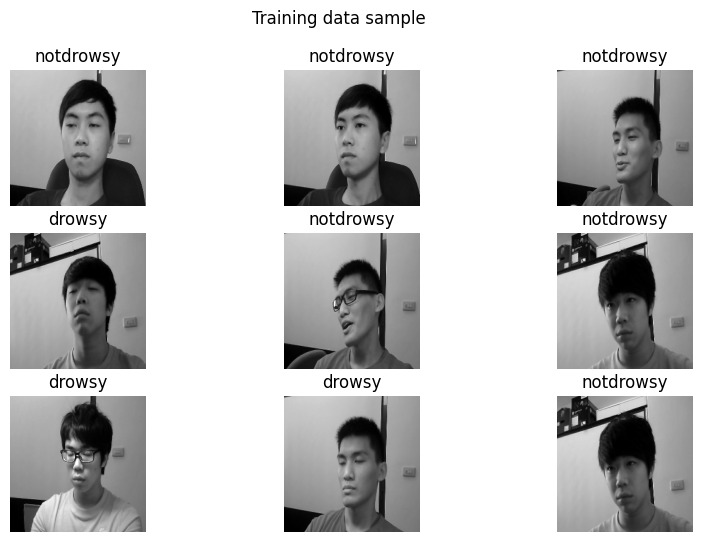

In [8]:
# 1. Load datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="binary",
    class_names=["drowsy", "notdrowsy"],
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    validation_split=0.3,   # 70% train, 30% val+test
    subset="training",
    seed=SEED
)

val_test_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="binary",
    class_names=["drowsy", "notdrowsy"],
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    validation_split=0.3,
    subset="validation",
    seed=SEED
)

# 2. Save class names BEFORE caching/prefetch
class_names = train_ds.class_names
print("Class names (inferred):", class_names)

# 3. Split val_test_ds into val/test
val_batches = int(0.5 * tf.data.experimental.cardinality(val_test_ds).numpy())
val_ds = val_test_ds.take(val_batches)
test_ds = val_test_ds.skip(val_batches)

print("\nDataset sizes (batches):")
print("Train:", tf.data.experimental.cardinality(train_ds).numpy())
print("Val:", tf.data.experimental.cardinality(val_ds).numpy())
print("Test:", tf.data.experimental.cardinality(test_ds).numpy())

# 4. Now apply cache/prefetch (after saving class_names)
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

# -------------------------
# Optional: visualize some samples
# -------------------------
def show_batch(dataset, title="Sample images"):
    plt.figure(figsize=(10, 6))
    for images, labels in dataset.take(1):
        for i in range(min(9, images.shape[0])):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            label = int(labels[i].numpy())  # float→int
            plt.title(class_names[label])
            plt.axis("off")
    plt.suptitle(title)
    plt.show()

show_batch(train_ds, "Training data sample")

In [12]:
# print(train_ds.shape)
print(type(train_ds))
print(train_ds)

# print(val_ds.shape)
print(type(val_ds))
print(val_ds)

# print(val_ds.shape)
print(type(test_ds))
print(test_ds)

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>
<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>
<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>


### **Check For Class Imbalance**

In [9]:
# 1. Check distribution of labels
def count_labels(dataset):
    counts = {0: 0, 1: 0}
    for _, labels in dataset.unbatch():
        lbl = int(labels.numpy())
        counts[lbl] += 1
    return counts

print("Train label distribution:", count_labels(train_ds))
print("Val label distribution:", count_labels(val_ds))
print("Test label distribution:", count_labels(test_ds))

/tmp/ipykernel_37/4148076536.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lbl = int(labels.numpy())


Train label distribution: {0: 7036, 1: 6964}
Val label distribution: {0: 1496, 1: 1512}
Test label distribution: {0: 1474, 1: 1518}


In [10]:
# 2. Compute Class weight 

from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Collect all training labels
train_labels = []
for _, labels in train_ds.unbatch():
    train_labels.append(int(labels.numpy()))
train_labels = np.array(train_labels)

# Compute weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_labels),
    y=train_labels
)
class_weights = dict(enumerate(class_weights))
print("Class Weights:", class_weights)

/tmp/ipykernel_37/306713654.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  train_labels.append(int(labels.numpy()))


Class Weights: {0: 0.9948834565093804, 1: 1.0051694428489375}


In [13]:
# -------------------------
# Data augmentation + preprocessing layers
# -------------------------
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.08),
    layers.RandomZoom(0.08),
    layers.RandomContrast(0.06),
], name="data_augmentation")

# Normalization layer (rescale pixels 0-1)
rescale = layers.Rescaling(1./255)

### **BEST MODEL Architecture from YAW DD Dataset WIthout Face Croping**

In [14]:
def build_improved_cnn(input_shape=IMG_SIZE + (3,)):
    inputs = keras.Input(shape=input_shape)
    
    # Data Augmentation + Normalization
    x = data_augmentation(inputs)
    x = rescale(x)

    #  Conv Block 1
    x = layers.Conv2D(32, 3, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D()(x)

    #  Conv Block 2
    x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D()(x)

    #  Conv Block 3
    x = layers.Conv2D(128, 3, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D()(x)

    #  Conv Block 4 (new, deeper features)
    x = layers.Conv2D(256, 3, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D()(x)

    #  Global Pooling (combine Avg + Max pooling)
    gap = layers.GlobalAveragePooling2D()(x)
    gmp = layers.GlobalMaxPooling2D()(x)
    x = layers.Concatenate()([gap, gmp])  

    #  Dense layers
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.25)(x)  # reduced dropout

    outputs = layers.Dense(1, activation='sigmoid')(x)  # binary classification
    model = keras.Model(inputs, outputs, name='improved_cnn')
    return model

In [15]:
improved_model = build_improved_cnn()
improved_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),  # slightly lower lr
    loss='binary_crossentropy',
    metrics=['accuracy']
)

improved_model.summary()

Model: "improved_cnn"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ data_augmentation   │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Sequential)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ data_augmentatio… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 224, 224,  │        896 │ rescaling_1[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 224, 224,  │        128 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 112, 112,  │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 112, 112,  │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 112, 112,  │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 56, 56,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 56, 56,    │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        512 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 28, 28,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 28, 28,    │    295,168 │ max_pooling2d_2[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │      1,024 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 14, 14,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 256)       │          0 │ max_pooling2d_3[… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 256)       │          0 │ max_pooling2d_3[

 Total params: 521,921 (1.99 MB)

 Trainable params: 520,961 (1.99 MB)

 Non-trainable params: 960 (3.75 KB)

In [16]:
#  Callbacks
callbacks = [
    keras.callbacks.ModelCheckpoint("improved_cnn_best.h5", save_best_only=True, monitor='val_accuracy'),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, verbose=1)
]

# Train
history_improved = improved_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS_CUSTOM,
    callbacks=callbacks
)

Epoch 1/50


I0000 00:00:1761500174.774373     112 cuda_dnn.cc:529] Loaded cuDNN version 90300


438/438 ━━━━━━━━━━━━━━━━━━━━ 65s 125ms/step - accuracy: 0.5514 - loss: 1.0565 - val_accuracy: 0.7094 - val_loss: 0.6187 - learning_rate: 1.0000e-04
Epoch 2/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 54s 124ms/step - accuracy: 0.7088 - loss: 0.5642 - val_accuracy: 0.6297 - val_loss: 0.6745 - learning_rate: 1.0000e-04
Epoch 3/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 55s 127ms/step - accuracy: 0.7600 - loss: 0.4919 - val_accuracy: 0.7420 - val_loss: 0.4896 - learning_rate: 1.0000e-04
Epoch 4/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 56s 128ms/step - accuracy: 0.8017 - loss: 0.4275 - val_accuracy: 0.7812 - val_loss: 0.4510 - learning_rate: 1.0000e-04
Epoch 5/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 57s 129ms/step - accuracy: 0.8196 - loss: 0.3918 - val_accuracy: 0.8228 - val_loss: 0.3740 - learning_rate: 1.0000e-04
Epoch 6/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 57s 131ms/step - accuracy: 0.8442 - loss: 0.3521 - val_accuracy: 0.8594 - val_loss: 0.3421 - learning_rate: 1.0000e-04
Epoch 7/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 57s 130ms/step - 

### **Helper Function For Prediction and Plot Model Loss & Accuracy**

In [18]:
# Build y_true and y_pred arrays for confusion matrix & classification report
def get_labels_and_predictions(model, dataset):
    y_true = []
    y_pred = []
    for images, labels in dataset.unbatch().batch(256):  # manageable chunks
        preds = model.predict(images, verbose=0).ravel()
        y_pred.extend((preds >= 0.5).astype(int).tolist())
        y_true.extend(labels.numpy().astype(int).tolist())
    return np.array(y_true), np.array(y_pred)


# Plot training curves for custom model
def plot_history(history, title_prefix=""):
    history_dict = history.history
    epochs_range = range(1, len(history_dict['loss']) + 1)

    plt.figure(figsize=(12, 4))
    # Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, history_dict['loss'], label='train_loss')
    plt.plot(epochs_range, history_dict['val_loss'], label='val_loss')
    plt.title(f'{title_prefix} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, history_dict['accuracy'], label='train_acc')
    plt.plot(epochs_range, history_dict['val_accuracy'], label='val_acc')
    plt.title(f'{title_prefix} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

### **Helper Function For GRAD CAM Visualization**

In [19]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from tensorflow import keras

#  Grad-CAM heatmap function for custom CNN
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    """
    Generate a Grad-CAM heatmap for a given image and model.
    
    Args:
        img_array (np.ndarray): Input image array of shape (1, H, W, 3)
            with pixel values in [0, 255].
        model (tf.keras.Model): The trained model containing a Rescaling layer.
        last_conv_layer_name (str): Name of the last convolutional layer.
        pred_index (int, optional): Class index to visualize. Defaults to predicted class.
    
    Returns:
        np.ndarray: Normalized heatmap (H, W) values in [0, 1].
    """

    # Build a model mapping input to activations + output
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Record gradients
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    # Compute gradient of class output wrt conv layer
    grads = tape.gradient(class_channel, conv_outputs)

    # Mean intensity of gradients for each feature map
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Weight each feature map by its importance
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalize to [0, 1]
    heatmap = tf.maximum(heatmap, 0)
    max_val = tf.math.reduce_max(heatmap)
    if max_val > 0:
        heatmap /= max_val

    return heatmap.numpy()



#  Overlay Gradcam on image
def overlay_gradcam(img, heatmap, alpha=0.4, colormap=cv2.COLORMAP_JET):
    """
    Overlay Grad-CAM heatmap on the original image.
    
    Args:
        img (np.ndarray): Original image array (H, W, 3), uint8 [0–255].
        heatmap (np.ndarray): Grad-CAM heatmap (H, W), float [0–1].
        alpha (float): Transparency factor for blending.
        colormap (int): OpenCV colormap to apply.
    
    Returns:
        np.ndarray: RGB image with heatmap overlay.
    """
    
    # Ensure image is uint8
    if img.dtype != np.uint8:
        img = np.uint8(255 * img / np.max(img))

    # Resize heatmap to match input image
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

    # Convert heatmap to RGB
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, colormap)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)  

    # Overlay heatmap on image
    superimposed_img = cv2.addWeighted(heatmap, alpha, img, 1 - alpha, 0)
    return superimposed_img


# Display Grad-CAM results for a few sample images
def show_gradcam_samples(dataset, class_names, model, last_conv_layer_name, num_images=3):
    """
    Display Grad-CAM visualizations for a few images from a dataset.
    
    Args:
        dataset (tf.data.Dataset): Dataset containing (image, label) pairs.
        class_names (list): List of class names in order.
        model (tf.keras.Model): Trained model.
        last_conv_layer_name (str): Name of the last convolutional layer.
        num_images (int): Number of images to visualize.
    """
    plt.figure(figsize=(12, 6))
    count = 0
    for images, labels in dataset.take(1):  # take 1 batch
        for i in range(min(num_images, images.shape[0])):
            img = images[i].numpy().astype("uint8")
            label = int(labels[i].numpy())  # cast to int

            # Expand dims (model includes its own normalization layer)
            img_array = np.expand_dims(images[i], axis=0)

            # Generate Grad-CAM
            heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
            superimposed_img = overlay_gradcam(img, heatmap)

            # Show original
            plt.subplot(2, num_images, i + 1)
            plt.imshow(img)
            plt.title(f"True: {class_names[label]}")
            plt.axis("off")

            # Show GradCAM
            plt.subplot(2, num_images, i + 1 + num_images)
            plt.imshow(superimposed_img)
            plt.title("GradCAM")
            plt.axis("off")

            count += 1
        break  # only take one batch
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_37/4207245862.py:106: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label = int(labels[i].numpy())  # cast to int
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


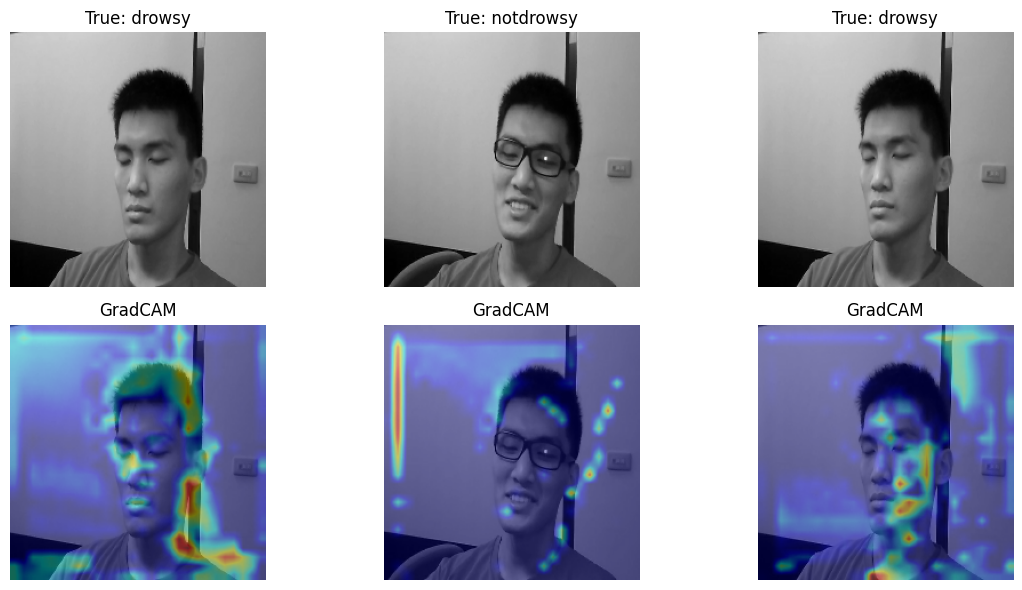

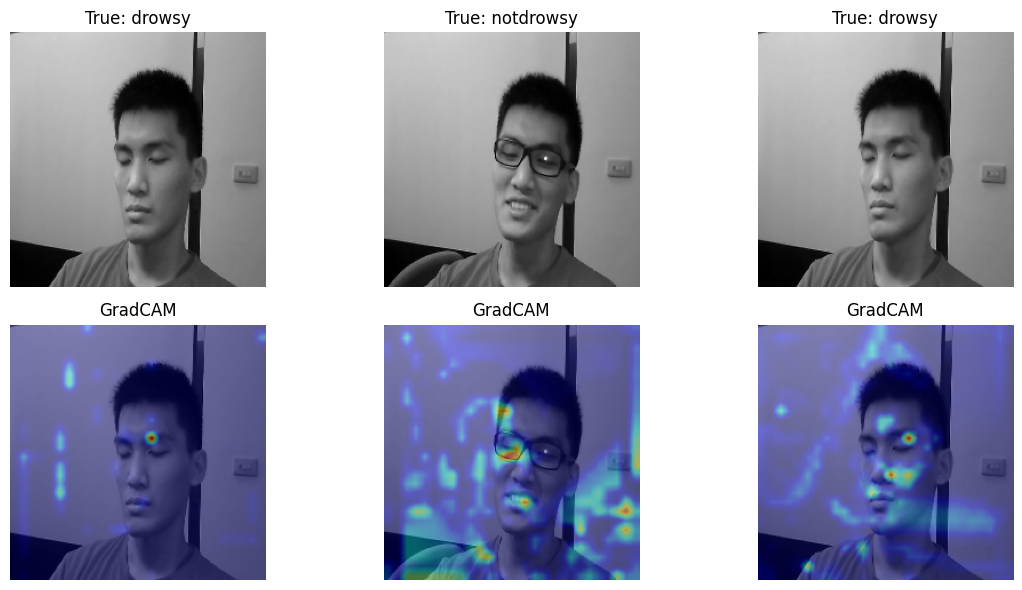

In [20]:
# Plot GRAD Cam for Few Images from test data

last_conv_layer_name = "conv2d_3"  # adjust if different in summary

# Train Data - Seen during training
show_gradcam_samples(test_ds, class_names, improved_model, last_conv_layer_name)


# Test Data - Completely Unseen
show_gradcam_samples(test_ds, class_names, improved_model, last_conv_layer_name)

94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9163 - loss: 0.2038

Custom CNN Test Loss: 0.1954, Test Accuracy: 0.9241

Custom CNN - Classification Report:

              precision    recall  f1-score   support

      drowsy       0.95      0.89      0.92      1474
   notdrowsy       0.90      0.96      0.93      1518

    accuracy                           0.92      2992
   macro avg       0.93      0.92      0.92      2992
weighted avg       0.93      0.92      0.92      2992



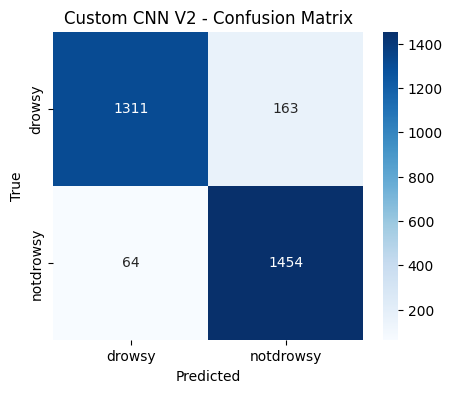

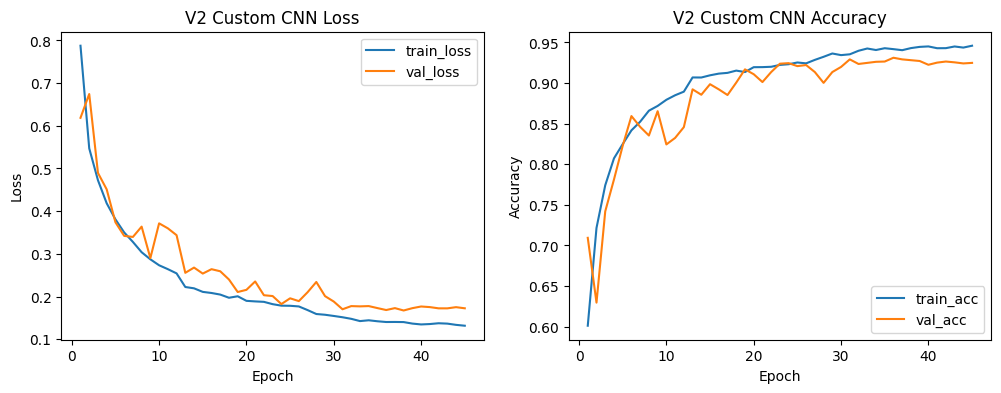

In [21]:
# -------------------------
# Evaluate on test set & metrics (Custom CNN)
# -------------------------
test_loss, test_acc = improved_model.evaluate(test_ds)
print(f"\nCustom CNN Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")



y_true_c, y_pred_c = get_labels_and_predictions(improved_model, test_ds)

# Confusion matrix & classification report
cm_c = confusion_matrix(y_true_c, y_pred_c)
print("\nCustom CNN - Classification Report:\n")
print(classification_report(y_true_c, y_pred_c, target_names=class_names,zero_division=0))



# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_c, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Custom CNN V2 - Confusion Matrix')
plt.show()

plot_history(history_improved, title_prefix="V2 Custom CNN")

### **For Improve Performance Crop the Face before passing into model Using FaceNET**

In [ ]:
!pip install -q facenet-pytorch
!pip install -q --upgrade --force-reinstall "Pillow<10.0.0"
!pip install -q --upgrade --force-reinstall "torchvision==0.17.1"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 36.6 MB/s eta 0:00:0000:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
facenet-pytorch 2.6.0 requires Pillow<10.3.0,>=10.2.0, but you have pillow 9.5.0 which is incompatible.
dopamine-rl 4.1.2 requires gymnasium>=1.0.0, but you have gymnasium 0.29.0 which is incompatible.
bigframes 2.12.0 requires google-cloud-bigquery[bqstorage,pandas]>=3.31.0, but you have google-cloud-bigquery 3.25.0 which is incompatible.
bigframes 2.12.0 requires rich<14,>=12.4.4, but you have rich 14.1.0 which is incompatible.
scikit-image 0.25.2 requires pillow>=10.1, but you have pillow 9.5.0 which is incompatible.
gradio 5.38.1 requires pydantic<2.12,>=2.0, but you have pydantic 2.12.0a1 which is incompatible.
plotnine 0.14.5 re

In [ ]:
import os
from tqdm import tqdm
from PIL import Image
import cv2
from facenet_pytorch import MTCNN
import torch

def load_image_cv2_to_pil(image_path):
    img_bgr = cv2.imread(image_path)
    if img_bgr is None:
        raise ValueError(f"Failed to load image {image_path} with cv2")
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    pil_img = Image.fromarray(img_rgb)
    return pil_img

device = 'cuda' if torch.cuda.is_available() else 'cpu'
mtcnn = MTCNN(keep_all=False, device=device)

import numpy as np
import cv2

def crop_face_mtcnn_cv2(image_path, save_path):
    try:
        img = load_image_cv2_to_pil(image_path)
    except Exception as e:
        print(f"Skipping corrupted/unreadable image: {image_path}. Error: {e}")
        return False

    boxes, _ = mtcnn.detect(img)
    if boxes is None:
        print(f"No face detected in {image_path}")
        return False

    box = boxes[0]
    width, height = img.size

    left = max(int(box[0]), 0)
    top = max(int(box[1]), 0)
    right = min(int(box[2]), width)
    bottom = min(int(box[3]), height)

    if right <= left or bottom <= top:
        print(f"Invalid bounding box for {image_path}, skipping.")
        return False

    face_img = img.crop((left, top, right, bottom))

    # Convert PIL Image to OpenCV format for saving
    face_np = np.array(face_img)          # RGB format
    face_bgr = cv2.cvtColor(face_np, cv2.COLOR_RGB2BGR)

    # Save with OpenCV
    success = cv2.imwrite(save_path, face_bgr)
    if not success:
        print(f"Failed to save cropped image: {save_path}")
        return False

    return True

class_names=["drowsy", "notdrowsy"]

def process_folder_mtcnn_cv2(input_folder, output_folder):
    os.makedirs(output_folder, exist_ok=True)
    filenames = [f for f in os.listdir(input_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
    for filename in tqdm(filenames, desc=f"Processing {os.path.basename(input_folder)}"):
        input_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, filename)
        crop_face_mtcnn_cv2(input_path, output_path)


# Process and save them into new folder
data_dir ='/kaggle/working/train_data_sampled'
drowsy_dir = os.path.join(data_dir, 'drowsy')
notdrowsy_dir = os.path.join(data_dir, 'notdrowsy')

output_base = '/kaggle/working/train_cropped_mtcnn'
drowsy_crop_dir = os.path.join(output_base, 'drowsy')
notdrowsy_crop_dir = os.path.join(output_base, 'notdrowsy')

process_folder_mtcnn_cv2(drowsy_dir, drowsy_crop_dir)
process_folder_mtcnn_cv2(notdrowsy_dir, notdrowsy_crop_dir)
